In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
csv = pd.read_csv("../logs/fig_1_20230203-124257.csv")
csv

,Operation,Size (MB),Ratio,Time
0,READ,512,1.000000,210.109
1,READ,512,0.666667,213.764
2,READ,1024,1.000000,200.590
3,READ,1024,0.666667,207.724
4,READ,2048,1.000000,189.712
5,READ,2048,0.666667,207.185
6,READ,3076,1.000000,185.926
7,READ,3076,0.666667,198.263
8,SCAN,512,1.000000,207.607
9,SCAN,512,0.666667,215.414


In [34]:
reads = csv[csv["Operation"] == "READ"]
reads_base = reads[reads["Ratio"] == 1]
reads_test = reads[reads["Ratio"] < 1]

# plt.plot(reads_base)

,Operation,Size (MB),Ratio,Time
1,READ,512,0.666667,213.764
3,READ,1024,0.666667,207.724
5,READ,2048,0.666667,207.185
7,READ,3076,0.666667,198.263


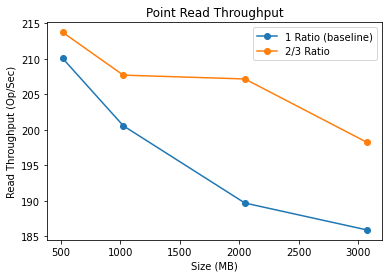

In [51]:
colname = csv.columns[1]
plt.plot(reads_base.iloc[:, 1], reads_base.iloc[:, -1], marker='o')
plt.plot(reads_test.iloc[:, 1], reads_test.iloc[:, -1], marker= 'o')
plt.title("Point Read Throughput")
plt.xlabel(colname)
plt.ylabel("Read Throughput (Op/Sec)")
plt.legend(["1 Ratio (baseline)", "2/3 Ratio"])
plt.show()

In [86]:
data2 = pd.read_csv("../logs/fig_3_20230203-100020.csv")
# data2[data2["Base Factor"] == 2]
data2

,Operation,Base Factor,Ratio,Time
0,WRITE,2,1.000000,25083.600
1,WRITE,2,0.666667,24458.500
2,WRITE,2,0.555556,24812.500
3,WRITE,4,1.000000,25537.300
4,WRITE,4,0.666667,24922.500
5,WRITE,4,0.555556,21771.500
6,WRITE,8,1.000000,24104.300
7,WRITE,8,0.666667,21025.300
8,WRITE,8,0.555556,19279.500
9,READ,2,1.000000,192.026


In [112]:
# if 'fig_3' in path:
data2["Read/Write Ratio"] = np.nan
for index, row in data2.iterrows():
    seg1 = data2[data2["Operation"] == "WRITE"]
    seg2 = seg1[seg1["Base Factor"] == row["Base Factor"]]
    seg3 = seg2[np.isclose(row["Ratio"], seg2["Ratio"])]
    data2.loc[index, "Read/Write Ratio"] = row["Time"] / seg3["Time"].iloc[0]
#     print(seg3["Time"] / row["Time"])
# data2
data2
# data2[data2["Operation"] == "READ"]
# seg1 = data2[data2["Operation"] == "WRITE"]
# seg2 = seg1[seg1["Base Factor"] == 2]
# seg2
# seg3 = seg2[np.isclose(0.666667, seg2["Ratio"])]
# seg3
# seg1 = data2[data2["Operation"] == "WRITE"]
# seg2 = seg1[seg1["Base Factor"] == row["Base Factor"]]
# seg3 = seg2[np.isclose(row["Ratio"], seg2["Ratio"])]
# seg3["Time"].iloc[0]


,Operation,Base Factor,Ratio,Time,Read/Write Ratio
0,WRITE,2,1.000000,25083.600,1.000000
1,WRITE,2,0.666667,24458.500,1.000000
2,WRITE,2,0.555556,24812.500,1.000000
3,WRITE,4,1.000000,25537.300,1.000000
4,WRITE,4,0.666667,24922.500,1.000000
5,WRITE,4,0.555556,21771.500,1.000000
6,WRITE,8,1.000000,24104.300,1.000000
7,WRITE,8,0.666667,21025.300,1.000000
8,WRITE,8,0.555556,19279.500,1.000000
9,READ,2,1.000000,192.026,0.007655


In [114]:
for base in data2[""]
for rat in data2["Ratio"].unique():

array([1.        , 0.66666667, 0.55555555])